In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def read_file(filename):
    img=cv2.imread(filename)
    img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

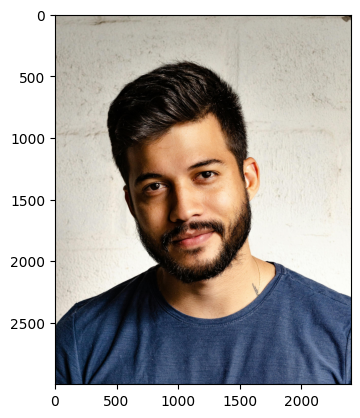

In [19]:
filename="img.jpg"
img=read_file(filename)

Create Edge Mask

In [20]:
import cv2

def edge_mask(img, line_size, blur_value):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Apply median blur
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(
        gray_blur,
        255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        line_size,
        blur_value
    )
    
    return edges


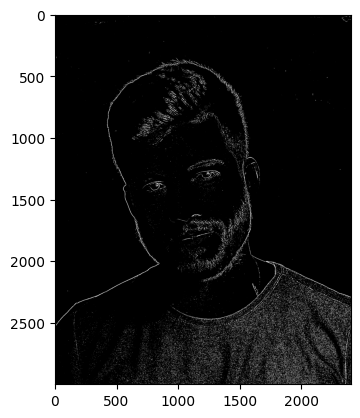

In [21]:
line_size,blur_value=7,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()


Reduce the Color Palette

In [22]:
def color_quantization(img ,k):
    #Transform the image
    data=np.float32(img).reshape((-1,3))
    #Determine Criteria
    criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    #Implementing K-Means
    rat,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

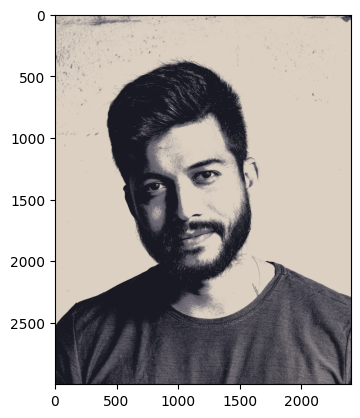

In [23]:
img=color_quantization(img,k=3)
plt.imshow(img)
plt.show()

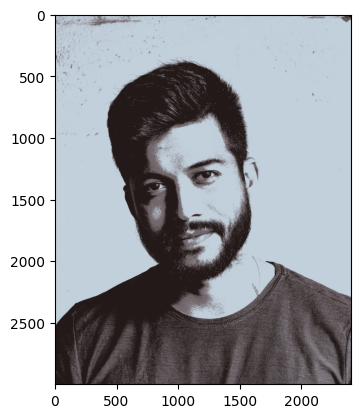

In [24]:
# Convert to uint8
img_uint8 = cv2.convertScaleAbs(img)

# Apply bilateral filter on the converted image
blurred = cv2.bilateralFilter(img_uint8, d=5, sigmaColor=200, sigmaSpace=200)

# Show result
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.show()

Combine Edge Msk with the quantiz img

In [25]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)

    plt.imshow(c)
    plt.title("Quantized")
    plt.show()
    

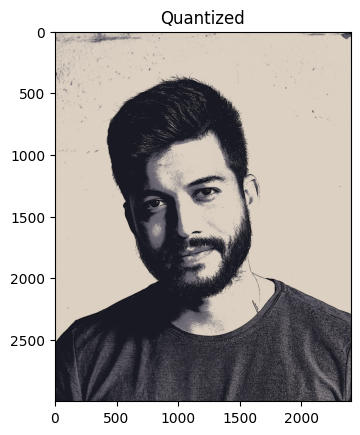

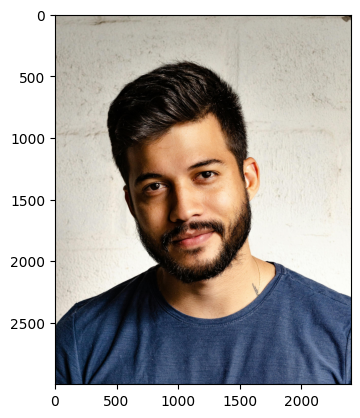

In [29]:
cartoon()
oimg=read_file("img.jpg")
